<a href="https://colab.research.google.com/github/codewithsubodh/house-price-prediction/blob/main/Copy_of_Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/Bengaluru_House_Data.csv')
df.head(20)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,204.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.00
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,NaN,1310,3.0,1.0,63.25
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020,6.0,NaN,370.00


In [ ]:
df.isnull().sum()

,0
area_type,0
availability,0
location,1
size,16
society,5502
total_sqft,0
bath,73
balcony,609
price,0


In [ ]:
from sklearn.preprocessing import OneHotEncoder
en = OneHotEncoder(handle_unknown='ignore')
area_encoder = en.fit_transform(df[['area_type']])

area_encoded = pd.DataFrame(area_encoder.toarray(),columns=en.get_feature_names_out())

df = pd.concat([df,area_encoded],axis=1)

df.drop('area_type',axis=1,inplace=True)
df.head(20)



,availability,location,size,society,total_sqft,bath,balcony,price,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area
0,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,0.0,0.0,0.0,1.0
1,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,0.0,0.0,1.0,0.0
2,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,1.0,0.0,0.0,0.0
3,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,0.0,0.0,0.0,1.0
4,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,0.0,0.0,0.0,1.0
5,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00,0.0,0.0,0.0,1.0
6,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,204.00,0.0,0.0,0.0,1.0
7,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.00,0.0,0.0,0.0,1.0
8,Ready To Move,Marathahalli,3 BHK,NaN,1310,3.0,1.0,63.25,0.0,0.0,0.0,1.0
9,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020,6.0,NaN,370.00,0.0,0.0,1.0,0.0


In [ ]:
df['size'] = df['size'].fillna(value='0 BHK')

In [ ]:
df.dtypes

,0
availability,object
location,object
size,object
society,object
total_sqft,object
bath,float64
balcony,float64
price,float64
area_type_Built-up Area,float64
area_type_Carpet Area,float64


In [ ]:
df['size'] = df['size'].str.extract(r'(\d+)').astype(float)

In [ ]:
df.isnull().sum()

,0
availability,0
location,1
size,0
society,5502
total_sqft,0
bath,73
balcony,609
price,0
area_type_Built-up Area,0
area_type_Carpet Area,0


In [ ]:
def convert_size(x):
    if pd.isnull(x):
        return np.nan
    if '_' in str(x):
       parts = x.split('_')
       try:
           return (float(parts[0])+float(parts[1]))/2
       except:
           return np.nan
    try:
         return float(x)
    except:
         return np.nan

df['total_sqft'] = df['total_sqft'].apply(convert_size)

In [ ]:
df.dtypes

,0
availability,object
location,object
size,float64
society,object
total_sqft,float64
bath,float64
balcony,float64
price,float64
area_type_Built-up Area,float64
area_type_Carpet Area,float64


In [ ]:
df['total_sqft'] = df['total_sqft'].fillna(value=df['total_sqft'].mean())

In [ ]:
df['bath'] = df['bath'].fillna(value=df['bath'].median())

In [ ]:
df['balcony'] = df['balcony'].fillna(value=df['balcony'].median())

In [ ]:
df.head(50)

,availability,location,size,society,total_sqft,bath,balcony,price,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area
0,19-Dec,Electronic City Phase II,2.0,Coomee,1056.000000,2.0,1.0,39.07,0.0,0.0,0.0,1.0
1,Ready To Move,Chikka Tirupathi,4.0,Theanmp,2600.000000,5.0,3.0,120.00,0.0,0.0,1.0,0.0
2,Ready To Move,Uttarahalli,3.0,NaN,1440.000000,2.0,3.0,62.00,1.0,0.0,0.0,0.0
3,Ready To Move,Lingadheeranahalli,3.0,Soiewre,1521.000000,3.0,1.0,95.00,0.0,0.0,0.0,1.0
4,Ready To Move,Kothanur,2.0,NaN,1200.000000,2.0,1.0,51.00,0.0,0.0,0.0,1.0
5,Ready To Move,Whitefield,2.0,DuenaTa,1170.000000,2.0,1.0,38.00,0.0,0.0,0.0,1.0
6,18-May,Old Airport Road,4.0,Jaades,2732.000000,4.0,2.0,204.00,0.0,0.0,0.0,1.0
7,Ready To Move,Rajaji Nagar,4.0,Brway G,3300.000000,4.0,2.0,600.00,0.0,0.0,0.0,1.0
8,Ready To Move,Marathahalli,3.0,NaN,1310.000000,3.0,1.0,63.25,0.0,0.0,0.0,1.0
9,Ready To Move,Gandhi Bazar,6.0,NaN,1020.000000,6.0,2.0,370.00,0.0,0.0,1.0,0.0


In [ ]:
df = df.drop(columns=['availability','location','society'])

In [ ]:
df.head(50)

,size,total_sqft,bath,balcony,price,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area
0,2.0,1056.000000,2.0,1.0,39.07,0.0,0.0,0.0,1.0
1,4.0,2600.000000,5.0,3.0,120.00,0.0,0.0,1.0,0.0
2,3.0,1440.000000,2.0,3.0,62.00,1.0,0.0,0.0,0.0
3,3.0,1521.000000,3.0,1.0,95.00,0.0,0.0,0.0,1.0
4,2.0,1200.000000,2.0,1.0,51.00,0.0,0.0,0.0,1.0
5,2.0,1170.000000,2.0,1.0,38.00,0.0,0.0,0.0,1.0
6,4.0,2732.000000,4.0,2.0,204.00,0.0,0.0,0.0,1.0
7,4.0,3300.000000,4.0,2.0,600.00,0.0,0.0,0.0,1.0
8,3.0,1310.000000,3.0,1.0,63.25,0.0,0.0,0.0,1.0
9,6.0,1020.000000,6.0,2.0,370.00,0.0,0.0,1.0,0.0


In [ ]:
df.dtypes

,0
size,float64
total_sqft,float64
bath,float64
balcony,float64
price,float64
area_type_Built-up Area,float64
area_type_Carpet Area,float64
area_type_Plot Area,float64
area_type_Super built-up Area,float64


In [ ]:
df.to_csv('cleaned_house_data.csv',index=False)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib

In [ ]:
df1 = pd.read_csv('/content/cleaned_house_data.csv')
df1.head(20)

,size,total_sqft,bath,balcony,price,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area
0,2.0,1056.0,2.0,1.0,39.07,0.0,0.0,0.0,1.0
1,4.0,2600.0,5.0,3.0,120.00,0.0,0.0,1.0,0.0
2,3.0,1440.0,2.0,3.0,62.00,1.0,0.0,0.0,0.0
3,3.0,1521.0,3.0,1.0,95.00,0.0,0.0,0.0,1.0
4,2.0,1200.0,2.0,1.0,51.00,0.0,0.0,0.0,1.0
5,2.0,1170.0,2.0,1.0,38.00,0.0,0.0,0.0,1.0
6,4.0,2732.0,4.0,2.0,204.00,0.0,0.0,0.0,1.0
7,4.0,3300.0,4.0,2.0,600.00,0.0,0.0,0.0,1.0
8,3.0,1310.0,3.0,1.0,63.25,0.0,0.0,0.0,1.0
9,6.0,1020.0,6.0,2.0,370.00,0.0,0.0,1.0,0.0


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   size                            13320 non-null  float64
 1   total_sqft                      13320 non-null  float64
 2   bath                            13320 non-null  float64
 3   balcony                         13320 non-null  float64
 4   price                           13320 non-null  float64
 5   area_type_Built-up  Area        13320 non-null  float64
 6   area_type_Carpet  Area          13320 non-null  float64
 7   area_type_Plot  Area            13320 non-null  float64
 8   area_type_Super built-up  Area  13320 non-null  float64
dtypes: float64(9)
memory usage: 936.7 KB


In [ ]:
x = df1.drop('price',axis=1)
y = df1['price']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((10656, 8), (2664, 8), (10656,), (2664,))

In [ ]:
my_model = RandomForestRegressor(n_estimators=200,max_depth=7,random_state=42)
my_model.fit(x_train, y_train)

RandomForestRegressor(max_depth=7, n_estimators=200, random_state=42)

In [ ]:
my_pred = my_model.predict(x_test)

print("MAE",mean_absolute_error(y_test,my_pred))
print("MSE",mean_squared_error(y_test,my_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,my_pred)))

MAE 34.93001299044339
MSE 7949.602144160495
RMSE 89.1605414079597


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,my_pred)
accuracy_score = r2_score(y_test,my_pred)
print(accuracy_score)

0.6266133761639849


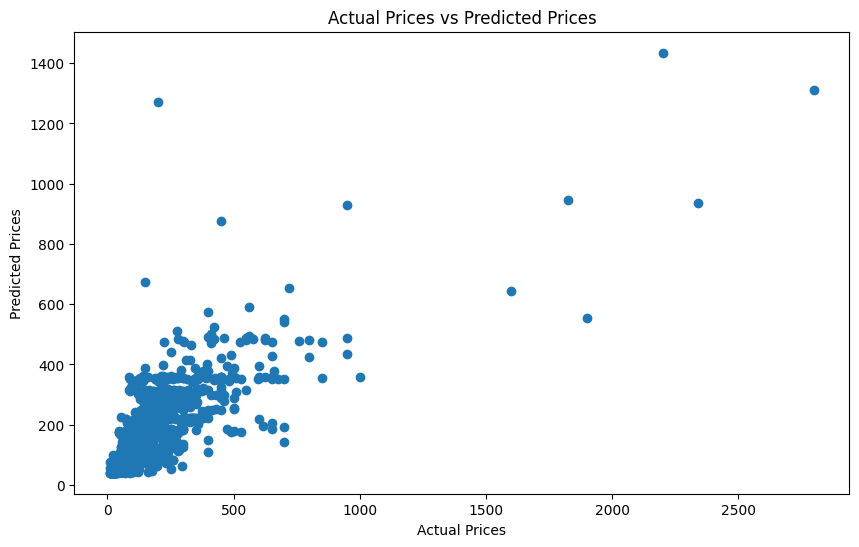

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(y_test,my_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [ ]:
joblib.dump(my_model,'house_price_prediction_model.plk')

['house_price_prediction_model.plk']

In [ ]:

sample_data = [[
    3,
    1500,
    2,
    2,
    0,
    0,
    0,
    1
]]

my_model.predict(sample_data)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([76.22402981])